In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')


In [74]:
df = pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,LP001002,Male,No,5849,NaN,Y
1,LP001003,Male,Yes,4583,128.0,N
2,LP001005,Male,Yes,3000,66.0,Y
3,LP001006,Male,Yes,2583,120.0,Y
4,LP001008,Male,No,6000,141.0,Y


In [75]:
df.shape

(598, 6)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Loan_ID          598 non-null    object 
 1   Gender           598 non-null    object 
 2   Married          598 non-null    object 
 3   ApplicantIncome  598 non-null    int64  
 4   LoanAmount       577 non-null    float64
 5   Loan_Status      598 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 28.2+ KB


In [77]:
df.describe()

,ApplicantIncome,LoanAmount
count,598.000000,577.000000
mean,5292.252508,144.968804
std,5807.265364,82.704182
min,150.000000,9.000000
25%,2877.500000,100.000000
50%,3806.000000,127.000000
75%,5746.000000,167.000000
max,81000.000000,650.000000


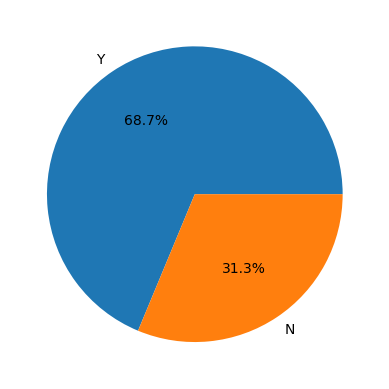

In [78]:
temp = df['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()

In [79]:
fig, ax = plt.figure(1, 2, figsize=(15, 5))
for i,col in enumerate(['Gender','Married']):
    plt.subplot(1,2,i+1)
    sns.countplot(data=df,x=col,hue='Loan_Status',ax=ax[i])
plt.tight_layout()
plt.show()

TypeError: figure() got multiple values for argument 'figsize'

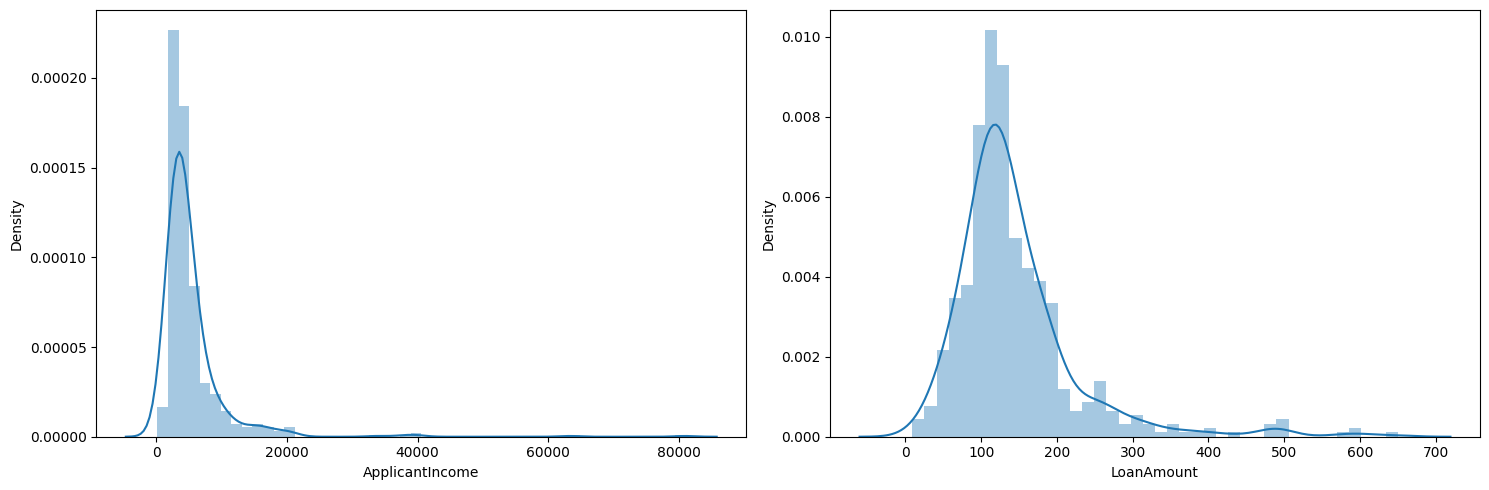

In [ ]:
fig,ax =plt.figure(1, 2,figsize=(15,5))
for i,col in enumerate(['ApplicantIncome','LoanAmount']):
    plt.subplot(1,2,i+1)
    sns.distplot(df[col],ax=ax[i])
plt.tight_layout()
plt.show()


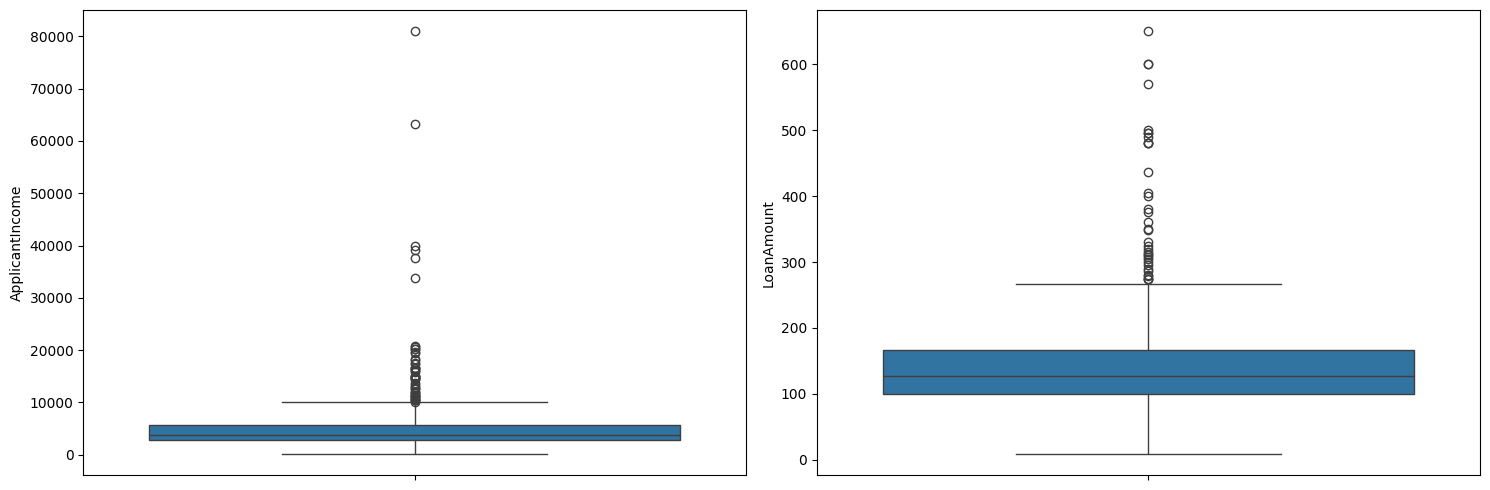

In [ ]:
fig,ax =plt.figure(1, 2,figsize=(15,5))
for i,col in enumerate(['ApplicantIncome','LoanAmount']):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col],ax=ax[i])
plt.tight_layout()
plt.show()


In [ ]:
df=df[df['ApplicantIncome']<25000]
df=df[df['LoanAmount']<400]


In [ ]:
df.groupby('Gender').mean(numeric_only=True)['LoanAmount']


Gender
Female    118.822430
Male      139.289823
Name: LoanAmount, dtype: float64

In [ ]:
df.groupby(['Married','Gender']).mean(numeric_only=True)['LoanAmount']


Married  Gender
No       Female    116.115385
         Male      126.644628
Yes      Female    126.103448
         Male      143.912387
Name: LoanAmount, dtype: float64

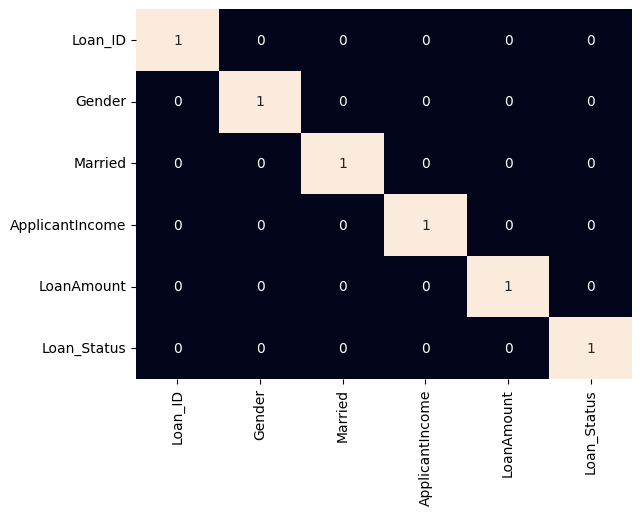

In [ ]:
def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            le =LabelEncoder()
            data[col] = le.fit_transform(data[col])
    return data
df = encode_labels(df)
sns.heatmap(df.corr()>0.8,
            annot = True,
            cbar=False)
plt.show()

In [ ]:
features = df.drop('Loan_Status',axis=1)
target = df['Loan_Status'].values
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=10)

ros = RandomOverSampler(sampling_strategy='minority',random_state=10)
x,y =ros.fit_resample(x_train,y_train)

x_train.shape,x.shape

((447, 5), (616, 5))

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.metrics import roc_auc_score
model = SVC(kernel='rbf')
model.fit(x,y)

print('Training Accuracy: ',metrics.roc_auc_score(y,model.predict(x)))
print('Validation Accuracy : ', metrics.roc_auc_score(y_test, model.predict(x_test)))
print()

Training Accuracy:  0.6055194805194805
Validation Accuracy :  0.5183193946634806



In [ ]:
from sklearn.metrics import confusion_matrix

cm =confusion_matrix(y_test,model.predict(x_test))

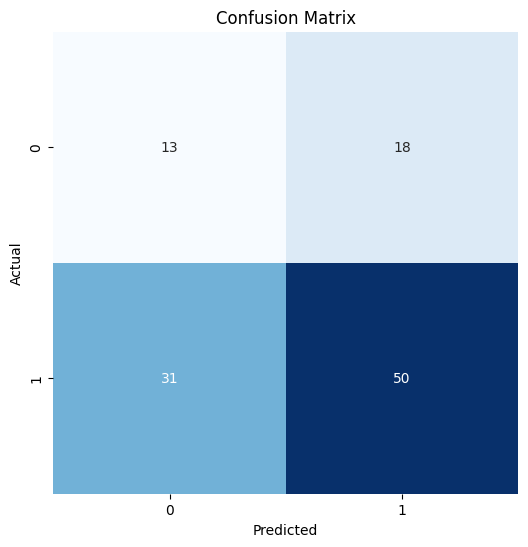

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(cm,
            annot=True,
            cmap='Blues',
            fmt='d',
            cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.30      0.42      0.35        31
           1       0.74      0.62      0.67        81

    accuracy                           0.56       112
   macro avg       0.52      0.52      0.51       112
weighted avg       0.61      0.56      0.58       112

